In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import requests
from datetime import date
import seaborn as sns
import geopandas as gpd

In [23]:
def convert(_from, _to, value=1, _date=None):
    if _date is None:
        url = 'https://api.exchangerate.host/convert?from={from_curr}&to={to_curr}&amount={val}'.format(val=value, from_curr=_from, to_curr=_to)
    else:
        url = 'https://api.exchangerate.host/convert?from={from_curr}&to={to_curr}&date={curr_date}&amount={val}'.format(val=value, from_curr=_from, to_curr=_to, curr_date=_date)

    response = requests.get(url)
    data = response.json()

    if not data['success']:
        return None
    
    return data['result']

In [69]:
data = pd.read_excel('data/data_example.xlsx', header = [1], index_col=None)
data.head()

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Moneda principal para cálculos,Área Terreno,Área Construcción,Valor comercial
0,2022-04-28 19:00:00,2,1,Lima,Lima,Magdalena del Mar,NaN,NaN,-12.120143,-77.023960,...,Exterior,2.0,3.0,1,Bueno,Comparación de mercado (directo),USD,0.0,81.56,120708.80
1,2022-04-27 19:00:00,6,4,Lima,Lima,San Juan de Lurigancho,1.0,NaN,-12.022509,-76.833715,...,Exterior,1.0,42.0,2,Regular,Costos o reposición (directo),USD,410.0,0.00,192225.00
2,2022-04-27 19:00:00,2,5,Lima,Lima,Santiago de Surco,1.0,NaN,-12.089686,-77.068454,...,Exterior,1.0,16.0,2,Bueno,Comparación de mercado (directo),USD,0.0,90.13,137886.28
3,2022-04-27 19:00:00,10,2,Lima,Lima,Pachacamac,NaN,1.0,-12.095758,-76.981323,...,Exterior,NaN,NaN,2,Bueno,Costos o reposición (directo),USD,120.0,0.00,44400.00
4,2022-04-27 19:00:00,1,3,Lima,Lima,San Isidro,NaN,NaN,-12.015309,-76.874213,...,Exterior,0.0,1.0,1,Muy bueno,Comparación de mercado (directo),PEN,0.0,45.00,111600.00


In [70]:
now_pen_to_usd = convert('PEN', 'USD')

pen_value = data[data['Moneda principal para cálculos'] == 'PEN']['Valor comercial']
data['Valor comercial'].update(pen_value.transform(lambda x : now_pen_to_usd*x))
data['Moneda principal para cálculos'].update(pen_value.transform(lambda x : 'USD'))
data.head()

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Moneda principal para cálculos,Área Terreno,Área Construcción,Valor comercial
0,2022-04-28 19:00:00,2,1,Lima,Lima,Magdalena del Mar,NaN,NaN,-12.120143,-77.023960,...,Exterior,2.0,3.0,1,Bueno,Comparación de mercado (directo),USD,0.0,81.56,120708.8000
1,2022-04-27 19:00:00,6,4,Lima,Lima,San Juan de Lurigancho,1.0,NaN,-12.022509,-76.833715,...,Exterior,1.0,42.0,2,Regular,Costos o reposición (directo),USD,410.0,0.00,192225.0000
2,2022-04-27 19:00:00,2,5,Lima,Lima,Santiago de Surco,1.0,NaN,-12.089686,-77.068454,...,Exterior,1.0,16.0,2,Bueno,Comparación de mercado (directo),USD,0.0,90.13,137886.2800
3,2022-04-27 19:00:00,10,2,Lima,Lima,Pachacamac,NaN,1.0,-12.095758,-76.981323,...,Exterior,NaN,NaN,2,Bueno,Costos o reposición (directo),USD,120.0,0.00,44400.0000
4,2022-04-27 19:00:00,1,3,Lima,Lima,San Isidro,NaN,NaN,-12.015309,-76.874213,...,Exterior,0.0,1.0,1,Muy bueno,Comparación de mercado (directo),USD,0.0,45.00,28055.2356


In [71]:
non_numerical = ['Fecha entrega del Informe',
                 'Tipo de vía',
                 'Departamento',
                 'Provincia',
                 'Distrito',
                 'Latitud (Decimal)',
                 'Longitud (Decimal)',
                 'Categoría del bien',
                 'Posición',
                 'Estado de conservación',
                 'Método Representado',
                 'Moneda principal para cálculos']

numerical = ['Piso',
             'Número de estacionamiento',
             'Depósitos',
             'Número de frentes',
             'Edad',
             'Elevador',
             'Área Terreno',
             'Área Construcción',
             'Valor comercial']

In [74]:
numerical_data = data.drop(non_numerical, axis=1)
numerical_data = numerical_data.replace(np.nan, 0.0).applymap(lambda x : np.log10(x + 0.00001))

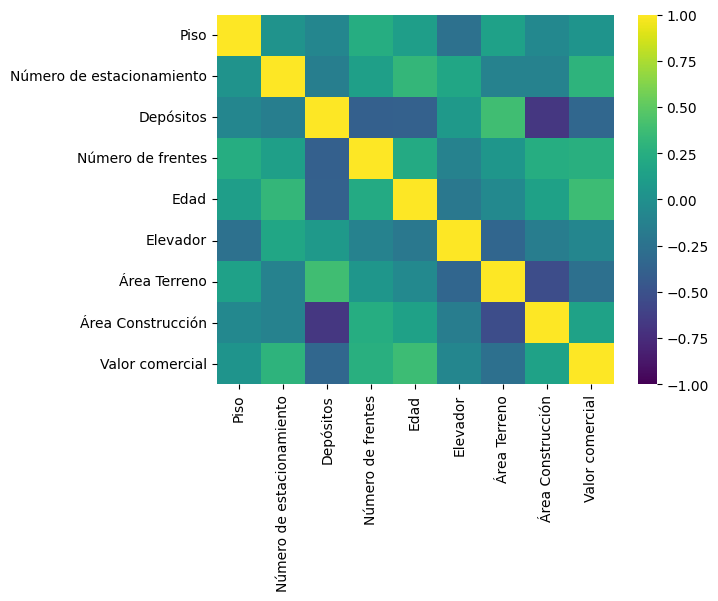

In [73]:
sns.heatmap(numerical_data.corr(), cmap='viridis', vmin=-1, vmax=1)
plt.show()

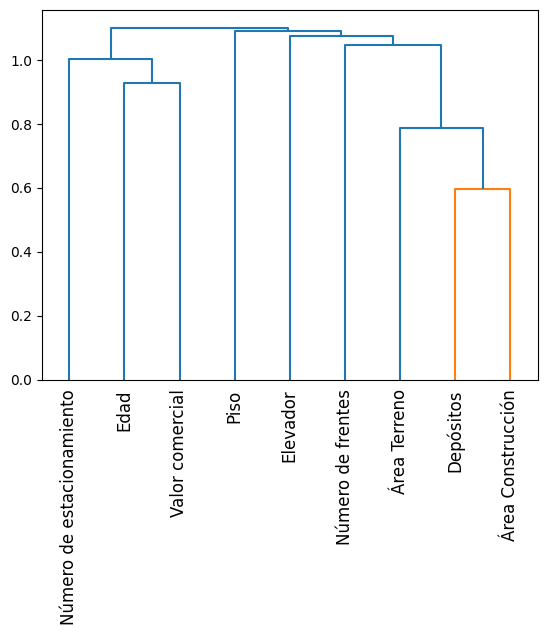

In [75]:
linkage_data = linkage(numerical_data.corr().applymap(lambda x: np.abs(x)), method='single', metric='euclidean')
dendrogram(linkage_data, labels=numerical_data.columns, leaf_rotation=90, count_sort=True)

plt.show()


In [56]:
geo_data = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [57]:
geo_data.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
